In [2]:
import numpy as np
%run Function.py

### Function definitions

In [3]:
def calculate_predict(x, weight):
    """
       This function is used to compute y_predict
    """
    p = sigmoid(np.dot(x, weight))
    y_predict = np.zeros(len(p))
    for i in range(len(p)):
        if p[i] >= 0.5:
            y_predict[i] = 1
        else:
             y_predict[i] = 0
    return y_predict

### Load data from mysql database

In [4]:
data = loadData('root', 'xzx970413', 'Wechat_inf', "User_inf", 3306)
data.head()

,User_id,User_Age,User_Work_year,Income,Debt,Borrow,Repay
0,1435223,24.0,2.0,28.0,17.3,1,0
1,172344,40.0,15.0,120.0,2.9,1,1
2,18661377320,NaN,NaN,0.0,0.0,1,0
3,1927233,43.0,12.0,38.0,3.6,1,1
4,234567,41.0,17.0,176.0,9.3,1,0


### Preprocess data 
Now just delete rows that contain NaN,
in future we could use some feature selection method

In [5]:
nan_index = []

for i in range(data.shape[0]):
    if (data.iloc[i].isna().any()):
        print(i)
        nan_index.append(i)

data = data.drop(nan_index, axis = 0)

data

2


,User_id,User_Age,User_Work_year,Income,Debt,Borrow,Repay
0,1435223,24.0,2.0,28.0,17.3,1,0
1,172344,40.0,15.0,120.0,2.9,1,1
3,1927233,43.0,12.0,38.0,3.6,1,1
4,234567,41.0,17.0,176.0,9.3,1,0
5,25233,39.0,20.0,67.0,30.6,1,1
6,2667623,28.0,10.0,31.0,17.3,0,1
7,34332423,27.0,0.0,16.0,1.7,0,1
8,657851236,21.0,0.0,0.0,0.0,1,1
9,7223654,36.0,13.0,25.0,19.7,0,0
10,783423,41.0,5.0,25.0,10.2,0,1


### Get training/test data set and labels

In [6]:
[Borrow, Repay] = splitData(data)

(X_train1, X_test1, y_train1, y_test1) = Borrow
(X_train2, X_test2, y_train2, y_test2) = Repay

### Build the model

In [7]:
GA_method = ['gradAscent', 'stocGradAscent', 'stocGradAscent1' ]
weights_borrow = logisticRegressionModel(X_train1, 
                                         y_train1,
                                         GA_method[1])
weights_repay = logisticRegressionModel(X_train2, 
                                        y_train2,
                                        GA_method[1])

In [8]:
p1 = sigmoid(np.dot(X_test1, weights_borrow))
y_predict1 = np.zeros(len(p1))
for i in range(len(p1)):
    if p1[i] >= 0.5:
        y_predict1[i] = 1
    else:
         y_predict1[i] = 0

p2 = sigmoid(np.dot(X_test2, weights_repay))
y_predict2 = np.zeros(len(p2))
for i in range(len(p2)):
    if p2[i] >= 0.5:
        y_predict2[i] = 1
    else:
         y_predict2[i] = 0

### Accuracy

In [9]:
accuracy1 = sum(y_predict1 == y_test1) / len(y_predict1)
print("accuracy1", accuracy1)
accuracy2 = sum(y_predict2 == y_test2) / len(y_predict2)
print("accuracy2", accuracy2)

accuracy1 0.5
accuracy2 1.0


### R-squared

In [10]:
import math
import numpy as np
from scipy import stats

In [11]:
def mathR(Y, Y_):
    yBar = np.mean(Y)
    SSR = 0
    SST = 0
    SSE = 0
    varX = 0
    varY = 0
    for i in range(0 , len(Y)):
        Y_YBardiff = Y_[i] - yBar
        SSR += Y_YBardiff**2
        
        YYBardiff = Y[i] - yBar
        SST += YYBardiff**2
        
        YY_diff = (Y[i] - Y_[i])
        SSE  += YY_diff**2
        
    print ("using math package：r-squared：", 1 - SSE / SST)
    return 

# For borrow class:
mathR(y_test1, y_predict1)
mathR(y_test2, y_predict2)

using math package：r-squared： -1.0
using math package：r-squared： 1.0


In [13]:
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

def R_square(y_train1, y_test1, y_train2, y_test2):
    y_train_pred1t = calculate_predict(X_train1, weights_borrow)
    y_test_pred1t = y_predict1
    y_train_pred2t = calculate_predict(X_train2, weights_repay)
    y_test_pred2t = y_predict2
    
    slr1=LinearRegression()
    slr1.fit(X_train1,y_train1)
    y_train_pred1=slr1.predict(X_train1)
    y_test_pred1 = slr1.predict(X_test1)
    
    slr2=LinearRegression()
    slr2.fit(X_train2,y_train2)
    y_train_pred2=slr2.predict(X_train2)
    y_test_pred2 = slr2.predict(X_test2)

    print ('BORROW sklearn R^2: train: %.3f, test:%.3f' % (r2_score(y_train1,y_train_pred1),
                                                             r2_score(y_test1,y_test_pred1)))
    print ('BORROW self R^2: train: %.3f,test:%.3f' % (r2_score(y_train1,y_train_pred1t),
                                                       r2_score(y_test1,y_test_pred1t)))
    print ('REPAY sklearn R^2: train: %.3f,test:%.3f' % (r2_score(y_train2,y_train_pred2),
                                                  r2_score(y_test2,y_test_pred2)))
    print ('REPAY self R^2: train: %.3f,test:%.3f' % (r2_score(y_train2,y_train_pred2t),
                                                      r2_score(y_test2,y_test_pred2t)))
    
R_square(y_train1, y_test1, y_train2, y_test2)

BORROW sklearn R^2: train: 0.390, test:-0.758
BORROW self R^2: train: -0.067,test:-1.000
REPAY sklearn R^2: train: 0.226,test:0.023
REPAY self R^2: train: 0.333,test:1.000


### ROC & AUC

AUC: 1.0


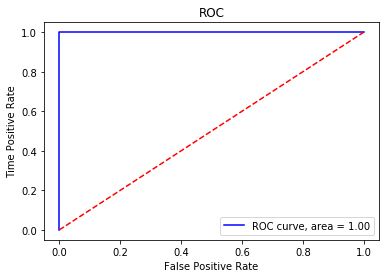

In [22]:
from sklearn.metrics import roc_curve, auc 
import matplotlib.pyplot as plt

def ROCplot(labels, predict_prob):
    FPR, TPR, thresholds = roc_curve(labels, predict_prob)
    roc_auc = auc(FPR, TPR)
    plt.title('ROC')
    plt.plot(FPR, TPR,'b',label='ROC curve, area = %0.2f'% roc_auc)
    plt.legend(loc='lower right')
    print ('AUC:', roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.ylabel('Time Positive Rate')
    plt.xlabel('False Positive Rate')

ROCplot(y_test2, y_predict2)

### p-value/t-test